In [0]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/PGPAIML/Advance Computer Vision/Project/files_required_for_face_recognition')

## Deep face recognition with Keras

### First, lets install the required libraries. Upload the `requirements.txt` file given and run the below commands.

In [4]:
!pip install -r requirements.txt --user

     |████████████████████████████████| 81kB 2.5MB/s 
     |████████████████████████████████| 5.4MB 8.2MB/s 
     |████████████████████████████████| 890kB 36.2MB/s 
     |████████████████████████████████| 112kB 42.8MB/s 
     |████████████████████████████████| 747kB 25.7MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 256kB 46.0MB/s 
     |████████████████████████████████| 133kB 49.6MB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
     |████████████████████████████████| 133kB 52.2MB/s 
     |████████████████████████████████| 327kB 50.8MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 15.0MB 29.6MB/s 
     |████████████████████████████████| 389kB 33.8MB/s 
     |████████████████████████████████| 8.0MB 25.1MB/s 
     |████████████████████████████████| 17.2MB 31.5MB/s 
     |████████████████████████████████| 24.9MB 1.5MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 

In [5]:
!pip install request

  Created wheel for request: filename=request-2019.4.13-cp36-none-any.whl size=1676 sha256=d2da38e65de3612aa7d9a0e0eae987821b8f3c17ae69b95034c766c2f94d210e
  Stored in directory: /root/.cache/pip/wheels/30/84/5f/484cfba678967ef58c16fce6890925d5c7172622f20111fbfd
  Created wheel for get: filename=get-2019.4.13-cp36-none-any.whl size=1692 sha256=5e1f9f997020ea0b4b0465c76baaeb20d2003a42ba73620048ffc62d22e7b283
  Stored in directory: /root/.cache/pip/wheels/c1/e3/c1/d02c8c58538853e4c9b78cadb74f6d5c5c370b48a69a7271aa
  Created wheel for post: filename=post-2019.4.13-cp36-none-any.whl size=1661 sha256=e9ee3753f7e13217c96f89b479441c281fba0d77244552927cd9a60783f8ea56
  Stored in directory: /root/.cache/pip/wheels/c3/c3/24/b5c132b537ab380c02d69e6bd4dec1f5db56b5fe19030473d7
  Created wheel for query-string: filename=query_string-2019.4.13-cp36-none-any.whl size=2049 sha256=baf61be992ca1ee5ab3fbef2b4c0bd769d041808b817867b96e11cbbe114e38c
  Stored in directory: /root/.cache/pip/wheels/d6/a4/78/01b

### Installing Dlib

In [6]:
!apt install python python-pip build-essential cmake pkg-config libx11-dev libatlas-base-dev libgtk-3-dev libboost-python-dev -y

!pip install dlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
python is already the newest version (2.7.15~rc1-1).
libatlas-base-dev is already the newest version (3.10.3-5).
libboost-python-dev is already the newest version (1.65.1.0ubuntu1).
libboost-python-dev set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base gir1.2-atk-1.0
  gir1.2-atspi-2.0 gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-g

### Download Dlib's face landmarks data file for running face alignment.

This will helps us in aligning faces before we learn the features for each face. **`Run the below code.`** It will create a directory with name **`models` **and save **`landmarks.dat`** file in that folder.

In [0]:
import bz2
import os

from urllib.request import urlopen

def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()
    
    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)

dst_dir = '/content/drive/My Drive/PGPAIML/Advance Computer Vision/Project/models'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)


### Training the network

The CNN model is taken from the Keras-OpenFace project. The architecture details aren't too important here, it's only useful to know that there is a fully connected layer with 128 hidden units followed by an L2 normalization layer on top of the convolutional base. These two top layers are referred to as the embedding layer from which the 128-dimensional embedding vectors can be obtained. The complete model is defined in `model.py` and a graphical overview is given in `model.png`. A Keras version of the `nn4.small2` model can be created with `create_model()`.


**Run the below code to initialize the model**

In [0]:
from model import create_model

nn4_small2 = create_model()

#### Idea of Training the model with Triplet loss function 

Model training aims to learn an embedding f(x) of image x such that the squared L2 distance between all faces of the same identity is small and the distance between a pair of faces from different identities is large. This can be achieved with a triplet loss L that is minimized when the distance between an anchor image xai and a positive image xpi (same identity) in embedding space is smaller than the distance between that anchor image and a negative image xni (different identity) by at least a margin α.

In [0]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(96, 96, 3))
in_p = Input(shape=(96, 96, 3))
in_n = Input(shape=(96, 96, 3))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = nn4_small2(in_a)
emb_p = nn4_small2(in_p)
emb_n = nn4_small2(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)

In [17]:
from data import triplet_generator

# triplet_generator() creates a generator that continuously returns 
# ([a_batch, p_batch, n_batch], None) tuples where a_batch, p_batch 
# and n_batch are batches of anchor, positive and negative RGB images 
# each having a shape of (batch_size, 96, 96, 3).
generator = triplet_generator() 

nn4_small2_train.compile(loss=None, optimizer='adam')
nn4_small2_train.fit_generator(generator, epochs=10, steps_per_epoch=100)

# Please note that the current implementation of the generator only generates 
# random image data. The main goal of this code snippet is to demonstrate 
# the general setup for model training. In the following, we will anyway 
# use a pre-trained model so we don't need a generator here that operates 
# on real training data.

Epoch 1/10
100/100 [==============================] - 45s 452ms/step - loss: 0.8110
Epoch 2/10
100/100 [==============================] - 15s 146ms/step - loss: 0.8010
Epoch 3/10
100/100 [==============================] - 15s 151ms/step - loss: 0.8002
Epoch 4/10
100/100 [==============================] - 15s 148ms/step - loss: 0.8003
Epoch 5/10
100/100 [==============================] - 15s 146ms/step - loss: 0.8005
Epoch 6/10
100/100 [==============================] - 15s 150ms/step - loss: 0.7999
Epoch 7/10
100/100 [==============================] - 14s 145ms/step - loss: 0.8002
Epoch 8/10
100/100 [==============================] - 15s 145ms/step - loss: 0.8003
Epoch 9/10
100/100 [==============================] - 15s 147ms/step - loss: 0.8001
Epoch 10/10
100/100 [==============================] - 15s 149ms/step - loss: 0.8000


For this project, we are considering a pre-trained model given in file path **`nn4.small2.v1.h5`**.

Write code: Using **load_weights()** function load the given pre-trained weight file.

In [0]:
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('nn4.small2.v1.h5', by_name=True)

### Dataset

To demonstrate face recognition on a custom dataset, a small dataset is used. It consists of around 15-25 face images of 10 different persons. The metadata for each image (file and identity name) are loaded into memory for later processing.


Upload Images zip file given to drive and download and extract it using the below code. And we will pass the folder `images` to `load_metadata` function to save all the images filenames and person numbers.

#### Import drive module from google.colab

In [0]:
from google.colab import drive

#### Give a path to mount the files in your drive

In [0]:
drive.mount('/content/drive')

#### Using the above given mounted path, give the images.zip path dependent on where you placed the file in your drive.

In [0]:
## For example
images_path = "/content/drive/My Drive/PGPAIML/Advance Computer Vision/Project/files_required_for_face_recognition/images.zip"

#### Using ZipFile module to extract the images zip file

In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile(images_path, 'r') as zip:
  zip.extractall(path="/content/drive/My Drive/PGPAIML/Advance Computer Vision/Project/")

#### Run the below function to load the images from the extracted images folder from the above step and map each image with person id 


In [0]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('/content/drive/My Drive/PGPAIML/Advance Computer Vision/Project/images')

### Face alignment
The nn4.small2.v1 model was trained with aligned face images, therefore, the face images from the custom dataset must be aligned too. Here, we use Dlib for face detection and OpenCV for image transformation and cropping to produce aligned 96x96 RGB face images. We are using the AlignDlib utility from the OpenFace project.

##### 1. Run the below code to import AlignDlib

For this you need align.py available in the environment.

In [0]:
from align import AlignDlib

Use the landmarks data file downloaded in the first steps for face alignment. file path **`models/landmarks.dat`**

In [0]:
# Initialize the OpenFace face alignment utility
alignment = AlignDlib('/content/drive/My Drive/PGPAIML/Advance Computer Vision/Project/models/landmarks.dat')

##### 2. Run the beloiw code to  load an image from the metadata created in the step before Face Alignment

You can access each image path from `metadata[i].image_path()` where, i is the image number. i can take values from 1 to no.of images in the dataset given.

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

(592, 896, 3)


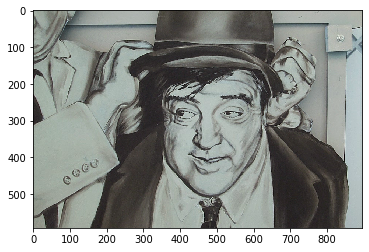

In [23]:
# Load an image
# for example, loading the image with index 1
one_image = load_image(metadata[0].image_path())
print(one_image.shape)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(one_image[...,::-1])

#### Write code to load 2nd and 3rd images in the metadata using load_image()

--------------
Second Image
--------------


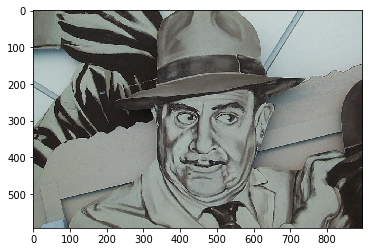

In [20]:
second_image = load_image(metadata[1].image_path())
fig,ax = plt.subplots(1)
print('-' * 14)
print("Second Image\n" + '-' * 14)
ax.imshow(second_image[...,::-1])
plt.show()

--------------
Third Image
--------------


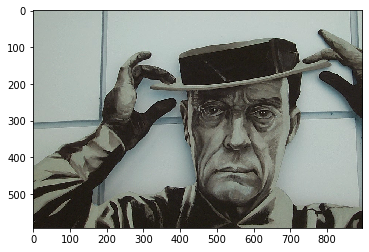

In [21]:
third_image = load_image(metadata[2].image_path())
fig,ax = plt.subplots(1)
print('-' * 14)
print("Third Image\n" + '-' * 14)
ax.imshow(third_image[...,::-1])
plt.show()

##### 3. Run the below code to align the above loaded image.

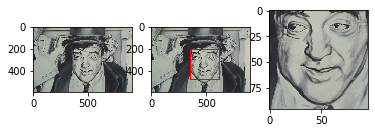

In [24]:
# Detect face and return bounding box
bb = alignment.getLargestFaceBoundingBox(one_image)

# Transform image using specified face landmark indices and crop image to 96x96
one_image_aligned = alignment.align(96, one_image, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Show original image
plt.subplot(131)
plt.imshow(one_image)

# Show original image with bounding box
plt.subplot(132)
plt.imshow(one_image)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(133)
plt.imshow(one_image_aligned);

#### Write a function image_align() which take image path as input and returns the aligned image in output.



In [0]:
def image_align(image_path):
  
  image = load_image(image_path)
  # Detect face and return bounding box
  bb = alignment.getLargestFaceBoundingBox(image)
  
  # Transform image using specified face landmark indices and crop image to 96x96
  image_aligned = alignment.align(96, image, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

  return image_aligned


### Generate embeddings for each image in the dataset

Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

#### Get embedding vector for first image in the metadata using the pre-trained model

In [79]:
# Align the image
img_aligned = image_align(metadata[0].image_path())

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img_aligned / 255.).astype(np.float32)

# obtain embedding vector for an image
embedding_vector = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]

print("PREDICTED EMBEDDING ARRAY SHAPE:")
print(embedding_vector.shape)

PREDICTED EMBEDDING ARRAY SHAPE:
(128,)


#### Write code to iterate through metadata and create embeddings for each image using nn4_small2_pretrained.predict() and store in a list with name `embeddings`

If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 128-zeroes as the final embedding from the model is of length 128.

In [56]:
good_image_indx = []
unfit_image_indx = []
embeddings = np.zeros((metadata.shape[0], 128))
for i, m in enumerate(metadata):
    # Align the image
    img_aligned = image_align(m.image_path())
    try:
        # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
        img = (img_aligned / 255.).astype(np.float32)
    except TypeError:
        unfit_image_indx.append(i)
        print("The image is not Clear to extract the Embeddings")
    else:
         # obtain embedding vector for an image
         embeddings[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
         good_image_indx.append(i)
         print("{}".format(m.file))

metadata = metadata[good_image_indx]
embeddings = embeddings[good_image_indx]

image_0403.jpg
image_0402.jpg
image_0400.jpg
image_0408.jpg
image_0405.jpg
image_0404.jpg
image_0406.jpg
image_0407.jpg
image_0422.jpg
image_0423.jpg
image_0409.jpg
image_0421.jpg
image_0420.jpg
image_0424.jpg
image_0418.jpg
image_0419.jpg
image_0425.jpg
image_0427.jpg
image_0426.jpg
image_0417.jpg
image_0416.jpg
image_0428.jpg
image_0414.jpg
image_0415.jpg
image_0411.jpg
image_0410.jpg
image_0412.jpg
image_0413.jpg
image_0378.jpg
image_0387.jpg
image_0393.jpg
image_0392.jpg
image_0386.jpg
image_0379.jpg
image_0390.jpg
image_0384.jpg
image_0385.jpg
image_0391.jpg
image_0395.jpg
image_0381.jpg
image_0380.jpg
image_0394.jpg
image_0382.jpg
image_0396.jpg
image_0397.jpg
image_0383.jpg
image_0398.jpg
image_0377.jpg
image_0388.jpg
image_0389.jpg
image_0284.jpg
image_0285.jpg
image_0278.jpg
image_0287.jpg
image_0286.jpg
image_0279.jpg
image_0269.jpg
image_0282.jpg
image_0283.jpg
image_0281.jpg
image_0280.jpg
image_0272.jpg
image_0273.jpg
image_0271.jpg
image_0270.jpg
image_0274.jpg
image_0275

In [58]:
print(len(embeddings))

199


#### Write code to get the distance between given 2 pairs of images.

Consider distance metric as "Squared L2 distance"

squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2



##### Plot images and get distance between the pairs given below.

1. 2,3 and 2,120

2. 30,31 and 30,100

3. 70,72 and 70,115

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

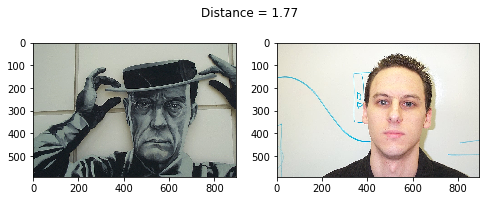

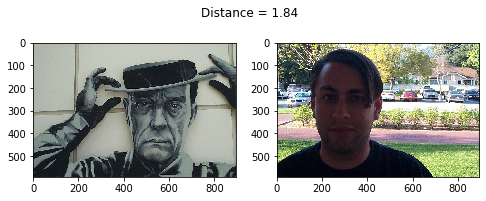

In [76]:
show_pair(2, 3)
show_pair(2,120)

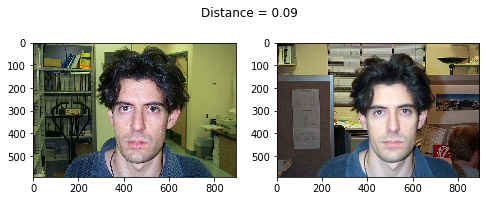

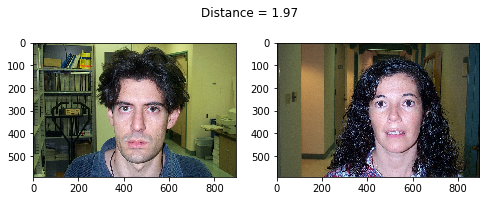

In [77]:
show_pair(30, 31)
show_pair(30, 100)

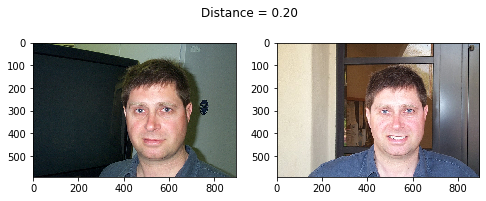

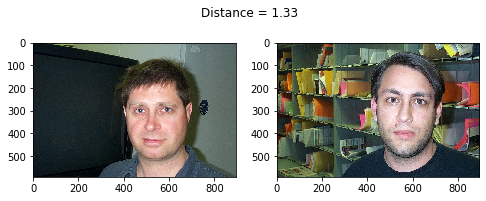

In [78]:
show_pair(70, 72)
show_pair(70,115)

#### Now lets build a SVM classifier to predict person in the given image. 

Use LinearSVC in sklearn.svm

Run the below code to divide half of the images as training set and another half of the images as test set.

In [74]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)

train_idx = np.arange(1, metadata.shape[0], 2)
test_idx = np.arange(0, metadata.shape[0], 2)

## checking the shapes of metaadata and test and train sets
print(metadata.shape)
print(train_idx.shape)
print(test_idx.shape)

# one half as train examples of 10 identities
X_train = np.array(embeddings)[train_idx]
# another half as test examples of 10 identities
X_test = np.array(embeddings)[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

(199,)
(99,)
(100,)


#### Build SVM and report the accuracy

In [60]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
print (svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [0]:
from sklearn.model_selection import KFold,cross_val_score
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))

In [62]:
evaluate_cross_validation(svc, X_train, y_train, 5)

[1.   1.   0.95 1.   1.  ]
Mean score: 0.990 (+/-0.010)


In [0]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [64]:
train_and_evaluate(svc, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.98989898989899
Accuracy on testing set:
0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       0.93      1.00      0.97        14
          10       1.00      1.00      1.00        10

    accuracy                           0.98       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.96      0.98      0.97       100

Confusion Matrix:
[[10  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0]
 

#### Test the classifier

Take 35th image from test set and plot the image, report to which person(folder name in dataset) the image belongs to.

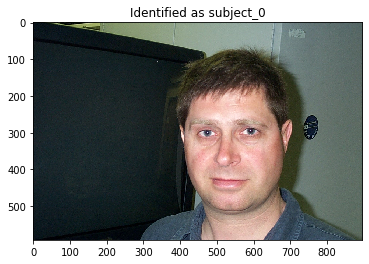

In [72]:
example_idx = 35

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');